In [ ]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow_addons as tfa
from PIL import Image
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import confusion_matrix
import shap

In [ ]:
# load the whole dataset, for data info
all_ds   = tfds.load("eurosat/all", with_info=True)
# load training, testing & validation sets, splitting by 60%, 20% and 20% respectively
train_ds = tfds.load("eurosat/all", split="train[:99%]")
# test_ds  = tfds.load("eurosat/all", split="train[90%:]")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/27000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/eurosat/all/2.0.0.incompleteIY8SYY/eurosat-train.tfrecord*...:   0%|      …

Dataset eurosat downloaded and prepared to /root/tensorflow_datasets/eurosat/all/2.0.0. Subsequent calls will reuse this data.


In [ ]:
# the class names
class_names = all_ds[1].features["label"].names
# total number of classes (10)
num_classes = len(class_names)
num_examples = all_ds[1].splits["train"].num_examples

In [ ]:
# number of testing steps
n_training_steps = int(all_ds[1].splits["train"].num_examples * 0.99)

# get all testing images as NumPy array
images = np.array([ d["sentinel2"] for d in train_ds.take(n_training_steps) ])
print("images.shape:", images.shape)

# get all testing labels as NumPy array
labels = np.array([ d["label"] for d in train_ds.take(n_training_steps) ])
print("labels.shape:", labels.shape)

images.shape: (26730, 64, 64, 13)
labels.shape: (26730,)


In [ ]:
# ind_train = []
# for i in range(0,images.shape[0]):

#   image1 = images[i]

#   aero_raw = image1[:,:,0]
#   aero = (aero_raw - aero_raw.min()) /(aero_raw.max() - aero_raw.min())

#   bleu_raw = image1[:,:,1]
#   bleu = (bleu_raw - bleu_raw.min()) /(bleu_raw.max() - bleu_raw.min())

#   green_raw = image1[:,:,2]
#   green = (green_raw - green_raw.min()) /(green_raw.max() - green_raw.min())

#   red_raw = image1[:,:,3]
#   red = (red_raw - red_raw.min()) /(red_raw.max() - red_raw.min())
#   # print(red.min(), red.max())

#   VegRed1_raw = image1[:,:,4]
#   VegRed1 = (VegRed1_raw - VegRed1_raw.min()) /(VegRed1_raw.max() - VegRed1_raw.min())

#   VegRed2_raw = image1[:,:,5]
#   VegRed2 = (VegRed2_raw - VegRed2_raw.min()) /(VegRed2_raw.max() - VegRed2_raw.min())

#   VegRed3_raw = image1[:,:,6]
#   VegRed3 = (VegRed3_raw - VegRed3_raw.min()) /(VegRed3_raw.max() - VegRed3_raw.min())

#   nir_raw = image1[:,:,7]
#   nir = (nir_raw - nir_raw.min()) /(nir_raw.max() - nir_raw.min())

#   Narnir_raw = image1[:,:,8]
#   Narnir = (Narnir_raw - Narnir_raw.min()) /(Narnir_raw.max() - Narnir_raw.min())

#   Watervapour_raw = image1[:,:,9]
#   Watervapour = (Watervapour_raw - Watervapour_raw.min()) /(Watervapour_raw.max() - Watervapour_raw.min())

#   Cirrus_raw = image1[:,:,10]
#   Cirrus = (Cirrus_raw - Cirrus_raw.min()) /(Cirrus_raw.max() - Cirrus_raw.min())

#   swir1_raw = image1[:,:,11]
#   swir1 = (swir1_raw - swir1_raw.min()) /(swir1_raw.max() - swir1_raw.min())

#   swir2_raw = image1[:,:,12]
#   swir2 = (swir2_raw - swir2_raw.min()) /(swir2_raw.max() - swir2_raw.min())

#   ndvi = (nir_raw - red_raw)/(nir_raw + red_raw)
#   ndvi = (ndvi - ndvi.min())/(ndvi.max() - ndvi.min())
#   # #print(ndvi.min(), ndvi.max())

#   ndwi = (green_raw - nir_raw)/(green_raw+nir_raw)
#   ndwi = (ndwi - ndwi.min())/(ndwi.max() - ndwi.min())
#   # #print(ndwi.min(), ndwi.max())

#   ndsi = (swir1_raw - nir_raw )/(swir1_raw + nir_raw )
#   ndsi = (ndsi - ndsi.min())/(ndsi.max() - ndsi.min())
#   # #print(ndbi.min(), ndbi.max())

#   st_indices = np.stack([aero ,bleu , green , red ,VegRed1 , VegRed2 , VegRed3 ,  nir , Narnir , Watervapour , Cirrus ,swir1 ,swir2 ,ndvi, ndwi, ndsi], axis=2)

#   #st_indices2 = np.uint8(st_indices1*127.5)

#   ind_train.append(st_indices)

# INDICIES = np.array(ind_train)
# print('INDICIES shape:', INDICIES.shape)
# print('INDICIES shape:', INDICIES.dtype)

In [ ]:
image_np1 = images[:,:,:,:9]
image_np2 = images[:,:,:,10:]
print(image_np1.shape)
print(image_np2.shape)

images = np.concatenate((image_np1, image_np2), axis=3)
print(images.shape)

(26730, 64, 64, 9)
(26730, 64, 64, 3)
(26730, 64, 64, 12)


In [ ]:
INDICIES = (images - images.min())/(images.max() - images.min())

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(INDICIES, labels, test_size=0.20, random_state=42, shuffle = True)

print(X_train.shape)
print(X_train.dtype)
print(X_train.max())
print(X_train.min())

print(y_train.shape)
print(y_train.dtype)

print(X_test.shape)
print(X_test.dtype)
print(X_test.max())
print(X_test.min())

print(y_test.shape)
print(y_test.dtype)

(21384, 64, 64, 12)
float32
1.0
0.0
(21384,)
int64
(5346, 64, 64, 12)
float32
0.9999286
0.0
(5346,)
int64


In [ ]:
X_train = np.load('X_train.npy')

y_train = np.load('y_train.npy')

X_test = np.load('X_test.npy')

y_test = np.load('y_test.npy')

In [ ]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: /device:GPU:0


In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(X_train.shape[1],
                                  X_train.shape[2],
                                  X_train.shape[3])),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
   layers.Normalization()
  ]
)

In [ ]:
filters = 16
model = Sequential([
  data_augmentation,

  layers.Conv2D(filters, 3, padding='same', kernel_initializer='he_normal', activation=tfa.activations.gelu),
  layers.Conv2D(filters, 3, padding='same', kernel_initializer='he_normal', activation=tfa.activations.gelu),
  layers.MaxPooling2D(),

  layers.Conv2D(2*filters, 3, padding='same', kernel_initializer='he_normal', activation=tfa.activations.gelu),
  layers.Conv2D(2*filters, 3, padding='same', kernel_initializer='he_normal', activation=tfa.activations.gelu),
  layers.MaxPooling2D(),

  layers.Conv2D(4*filters, 3, padding='same', kernel_initializer='he_normal', activation=tfa.activations.gelu),
  layers.Conv2D(4*filters, 3, padding='same', kernel_initializer='he_normal', activation=tfa.activations.gelu),
  layers.MaxPooling2D(),

  layers.Conv2D(8*filters, 3, padding='same', kernel_initializer='he_normal', activation=tfa.activations.gelu),
  layers.Conv2D(8*filters, 3, padding='same', kernel_initializer='he_normal', activation=tfa.activations.gelu),
  layers.MaxPooling2D(),

  layers.Conv2D(16*filters, 3, padding='same', kernel_initializer='he_normal', activation=tfa.activations.gelu),
  layers.Conv2D(16*filters, 3, padding='same', kernel_initializer='he_normal', activation=tfa.activations.gelu),
  layers.MaxPooling2D(),

  layers.Flatten(),

  layers.Dense(32*filters, activation=tfa.activations.gelu),
  # layers.Dropout(0.1),
  layers.Dense(16*filters, activation=tfa.activations.gelu),
  # layers.Dropout(0.2),
  layers.Dense(8*filters, activation=tfa.activations.gelu),
  # layers.Dropout(0.3),
  layers.Dense(10, activation = "softmax")
])

model.compile(optimizer=tfa.optimizers.LAMB(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 64, 64, 12)        25        
                                                                 
 conv2d_10 (Conv2D)          (None, 64, 64, 16)        1744      
                                                                 
 conv2d_11 (Conv2D)          (None, 64, 64, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 conv2d_13 (Conv2D)          (None, 32, 32, 32)        9248      
                                                      

In [ ]:
# fiting the model
epochs = 100

# Callback options for preventing overfitting (earlystopping)
callbacksOptions = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1),
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001, verbose=1),

    # save best only result
    keras.callbacks.ModelCheckpoint('eurosat_SNR.h5', verbose=1, save_best_only=True, save_weights_only=True)
]

In [ ]:
history = model.fit(
  X_train, y_train,
  validation_split=0.10,
  epochs=epochs,
  callbacks=callbacksOptions,
  batch_size = 64
)

Train on 19245 samples, validate on 2139 samples
Epoch 1/100
19245/19245 [==============================] - ETA: 0s - loss: 1.6449 - acc: 0.3757

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.



Epoch 1: val_loss improved from inf to 1.02509, saving model to eurosat_SNR.h5
19245/19245 [==============================] - 28s 1ms/sample - loss: 1.6449 - acc: 0.3757 - val_loss: 1.0251 - val_acc: 0.6269 - lr: 0.0010
Epoch 2/100
19200/19245 [============================>.] - ETA: 0s - loss: 0.8931 - acc: 0.6727
Epoch 2: val_loss improved from 1.02509 to 0.73847, saving model to eurosat_SNR.h5
19245/19245 [==============================] - 18s 959us/sample - loss: 0.8933 - acc: 0.6726 - val_loss: 0.7385 - val_acc: 0.7167 - lr: 0.0010
Epoch 3/100
19200/19245 [============================>.] - ETA: 0s - loss: 0.7499 - acc: 0.7251
Epoch 3: val_loss improved from 0.73847 to 0.61221, saving model to eurosat_SNR.h5
19245/19245 [==============================] - 18s 957us/sample - loss: 0.7497 - acc: 0.7254 - val_loss: 0.6122 - val_acc: 0.7765 - lr: 0.0010
Epoch 4/100
19200/19245 [============================>.] - ETA: 0s - loss: 0.5987 - acc: 0.7811
Epoch 4: val_loss improved from 0.61221

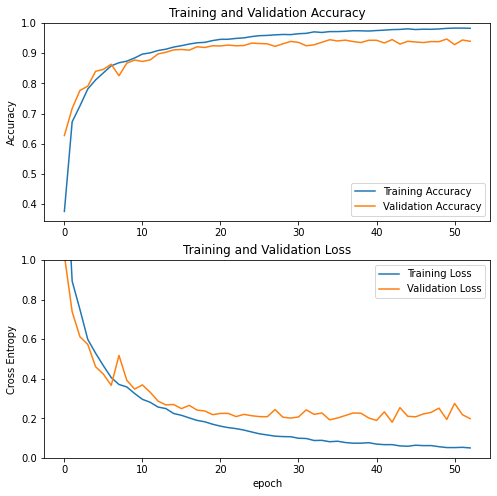

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()



In [ ]:
class_names = ['Annual Crop', 'Forest', 'Herbaceous Vegetation', 'Highway', 'Industrial', 'Pasture', 'Permanent Crop', 'Residential', 'River', 'SeaLake']
num_classes = len(class_names)
# feed the images to get predictions
predictions = model.predict(X_test)
# perform argmax to get class index
predictions = np.argmax(predictions, axis=1)
print("predictions.shape:", predictions.shape)

`Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.


predictions.shape: (5346,)


Text(0.5, 69.0, 'Predicted')

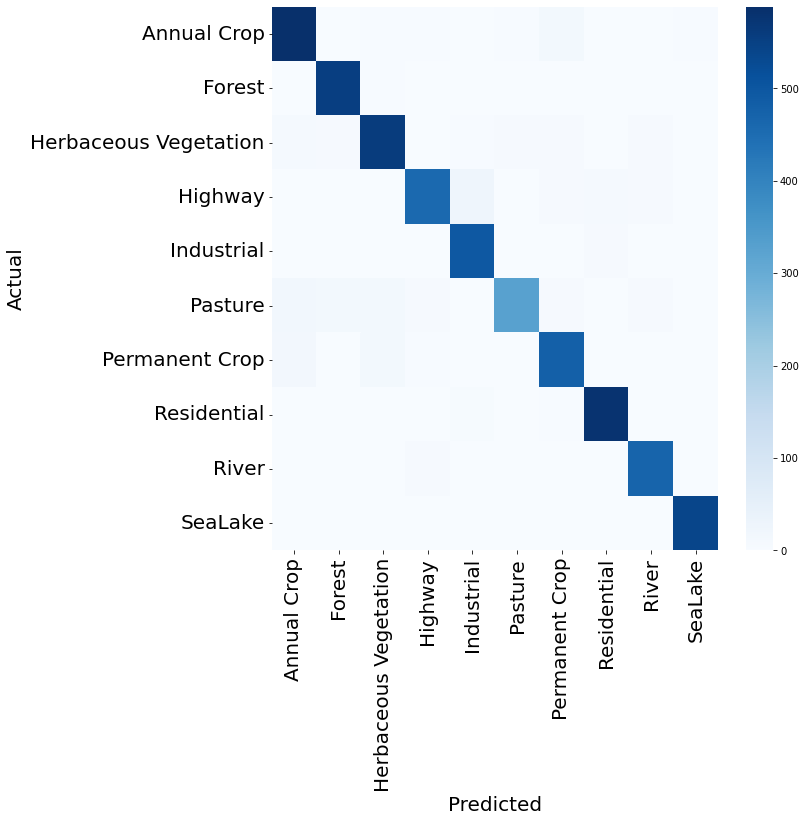

In [ ]:
cf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 10))
sns.heatmap(cf_matrix, annot=False, fmt='.0f',  xticklabels=[f"{c}" for c in class_names],
            yticklabels=[f"{c}" for c in class_names],
            # cmap="Blues"
            cmap="Blues")

plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel('Actual', fontsize=20)
plt.xlabel('Predicted', fontsize=20)

# plt.savefig(root_path+'conf_rs_index.eps', bbox_inches='tight', format = 'eps')
# plt.savefig(root_path+'conf_rs_index.svg', bbox_inches='tight', format = 'svg')

In [ ]:
import sklearn
print("\nClassification Report :")
print(sklearn.metrics.classification_report(y_test, predictions, target_names=class_names, digits = 4))


Classification Report :
                       precision    recall  f1-score   support

          Annual Crop     0.9231    0.9545    0.9385       616
               Forest     0.9552    0.9893    0.9720       561
Herbaceous Vegetation     0.9396    0.9180    0.9287       610
              Highway     0.9424    0.8876    0.9142       516
           Industrial     0.9257    0.9861    0.9549       505
              Pasture     0.9618    0.8094    0.8790       404
       Permanent Crop     0.9213    0.9249    0.9231       519
          Residential     0.9635    0.9847    0.9740       589
                River     0.9438    0.9711    0.9572       484
              SeaLake     0.9909    1.0000    0.9954       542

             accuracy                         0.9461      5346
            macro avg     0.9467    0.9426    0.9437      5346
         weighted avg     0.9464    0.9461    0.9455      5346



In [ ]:
# np.save('X_train.npy', X_train)
# np.save('y_train.npy', y_train)
# np.save('X_test.npy', X_test)
# np.save('y_test.npy', y_test)

In [ ]:
# select backgroud for shap
background = X_train[np.random.choice(X_train.shape[0], 800, replace=False)]# DeepExplainer to explain predictions of the model
explainer = shap.DeepExplainer(model, background)# compute shap values

shap_values = explainer.explainer.shap_values(X_test[0:500], check_additivity=False)


keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.



In [ ]:
shap_np = np.array(shap_values)
print(shap_np.shape)

(10, 500, 64, 64, 12)


In [ ]:
lst = [
  'B01',
  'B02',
  'B03',
  'B04',
  'B05',
  'B06',
  'B07',
  'B08',
  'B8A',
  'B09',
  'B11',
  'B12'
  ]

my_matrix = np.zeros((int(len(class_names)), int(len(lst))))
print(my_matrix)


# import pandas as pd
# shap_df = pd.DataFrame(shap, columns = lst, index = class_names)
# shap_df

for i in range(len(class_names)):
  for j in range(len(lst)):
    print("class = ", class_names[i])
    print("Band = ", lst[j])
    ave = np.average(np.abs(shap_np[i,:,:,:,j]))
    my_matrix[i,j]= ave
    print(ave)

shap = np.array(my_matrix)
print(shap.shape)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
class =  Annual Crop
Band =  B01
1.1644552422631383e-06
class =  Annual Crop
Band =  B02
4.668077852405427e-06
class =  Annual Crop
Band =  B03
5.142012956455607e-06
class =  Annual Crop
Band =  B04
6.401824078703245e-06
class =  Annual Crop
Band =  B05
4.842802526755777e-06
class =  Annual Crop
Band =  B06
2.570882710373227e-06
class =  Annual Crop
Band =  B07
7.509924081703978e-06
class =  Annual Crop
Band =  B08
1.1018616150108558e-05
class =  Annual Crop
Band =  B8A
1.5155956444396622e-06
class =  Annual Crop
Band =  B09
9.719957280717865e-06
class =  Annual Crop
Band =  B11
7.3392633883583855e-06


9.657290051844797e-07
2.7598655962257046e-05


<Figure size 432x288 with 0 Axes>

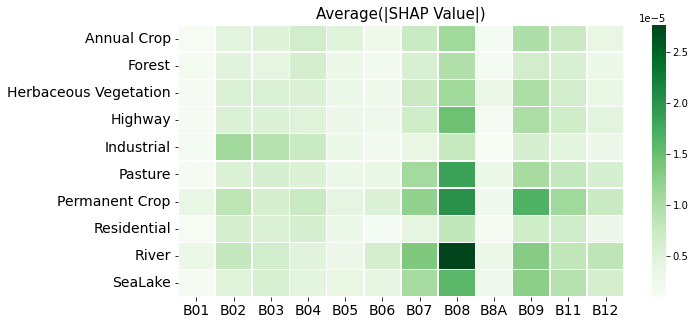

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

print(shap.min())
print(shap.max())

plt.figure()
fig, ax = plt.subplots(figsize=(10,5))
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Average(|SHAP Value|)", fontsize=15)
fig = sb.heatmap(shap, cmap='Greens', linewidths=0.5, annot=False, xticklabels= lst, yticklabels=class_names)
plt.savefig('feature importance.svg', format='svg', bbox_inches='tight')
plt.savefig('feature importance.eps', format='eps', bbox_inches='tight')